In [73]:
# import sys
# reload(sys)
# sys.setdefaultencoding("utf-8")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
#  !pip install levenshtein

In [2]:
paths = [
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2003',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2004',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2005',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2006',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2007',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2008',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2009',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2010',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2011',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2012',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2013',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2014',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2015',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2016']

# list of paths where our data is located

In [3]:
import requests
listings = []
for i in paths:
    listings.append(requests.get(i).text)   # create listings from raw data

In [4]:
#listings[0]

In [5]:
rentals_pre2012 = {}   # create the pre2012 data
a = 2003
for rents in listings:    #iterate through each year up until 2012
    if a == 2012:
        break
    rents = rents.split('\n')   #split on new line, separate listings
    rentals_pre2012[a] = []
    for rent in rents:
        rent = rent.lstrip()
        rent = rent.rstrip()
        if rent.startswith('$') == True:
            rentals_pre2012[a].append(rent)
    a = a + 1    # create listings for every year
    
for i in rentals_pre2012:
    print i, 'count:', len(rentals_pre2012[i])
    
    # count how many listings with a dollar sign in the listings for pre 2012

2003 count: 497
2004 count: 6434
2005 count: 15456
2006 count: 4530
2007 count: 890
2008 count: 487
2009 count: 195
2010 count: 99
2011 count: 1486


In [7]:
# count how many listings with a dollar sign in the listings for post 2012
a = 2012
rentals_post2012 = {}
for rents in listings[9:]:
    rents = rents.split('\n')
    rentals_post2012[a] = []
    for rent in rents:
        rent = rent.lstrip()
        rent = rent.rstrip()
        if '$' in rent:
            rentals_post2012[a].append(rent)
    a = a + 1

for i in rentals_post2012:
    print i, 'count:', len(rentals_post2012[i])

2016 count: 2499
2012 count: 2289
2013 count: 782
2014 count: 2230
2015 count: 2035


In [8]:
rentals_pre2012[2005][0:10]   # check out what our data looks like

[u'$925 - Affordable Renovated Studio (downtown / civic / van ness) pic',
 u'$1100 / 1br - ~~1 Bd. Apart. w/ Views of the S.F. Bay Available Now:)',
 u'$1650 / 2br - 2 bedroom & 1 bathroom apt...',
 u'$2300 / 3br - 3 Bdrm / 2 Baths / Back Yard/Deck Apt. for Rent (noe valley)',
 u'$1795 / 1br - Presido Heights Large Beautiful 1Br Open House 1/7Sat&amp;1/8Sun 2-4:0 (laurel hts / presidio)',
 u'$1795 / 1br - Pacific Heights Elegant Veiw Remodeled OpenHouse 1/7Sat&and 1/8Sun 2-4 (pacific heights)',
 u'$1290 / 1br - Large SF 1-Bedroom Apartment \u2013 TAKE PHOTO TOUR! (USF / panhandle)',
 u'$1050 - Large SF Studio Apartment \u2013 TAKE PHOTO TOUR! (USF / panhandle)',
 u'$1095 / 1br - 1BED 1BATH APARTMENT NEW PAINT AND DOUBLE PANE WINDOWS!!!!! (sunset / parkside) pic',
 u'$1650 / 2br - top floor, hardwood, sunny, no pets*OPEN HOUSE* (haight ashbury) pic']

In [9]:
rentals_post2012[2012][0:10]    #check out data

[u'GORGEOUS 1BEDROOM 1BATH PENTHOUSE - $2790 / 1br - (SOMA / south beach) pic',
 u'AVAILABLE NOW! SPACIOUS 3BR 2BA - $3510 / 3br - (bernal heights) pic',
 u'1 Bedroom Apt above bar in prime location - $1995 / 1br - 550ft\xb2 - (mission district)',
 u'Brand New Luxury Community- Available~~ Pets OK - $2735 / 1br - (SOMA / south beach) pic',
 u'SEE TODAY*New Bathroom&Kitchen*Hardwood*Granite*Larkin & Post St - $1195 / 200ft\xb2 - (lower nob hill) pic',
 u'*See 1-4 today*Quiet*Hardwood *nr BART*Larkin St. - $1495 / 1br - 500ft\xb2 - (downtown / civic / van ness) pic',
 u'Charming 3 BR/2 BA Sunset home for rent - AVAILABLE ASAP - $2675 / 3br - (sunset / parkside) pic',
 u'Sunset- Spacious 1bd/1ba - 1 bedroom/1bathroom - $1500 (sunset / parkside) pic',
 u'In Law Master Bedroom w/ Private Bath - 34th Ave Quintara & Rivera - $650 (sunset / parkside)',
 u'Brand newSpacious, Luxury 2br/2ba Apt. Available Now.. - $3065 / 2br - (ingleside / SFSU / CCSF) pic']

In [11]:
# # prase through the listings and create our data dictionarys
# import re
# price = {}
# br = {}
# description = {}
# district = {}
# districts_new_set = []
# for a in range(2003,2012):
#     price[a] = []    # initiate key of each year
#     br[a] = []
#     description[a] = []
#     district[a] = []
    
#     for i in rentals_pre2012[a]:
#         i = i.lower()
#         i.split()[0]
            
#         price[a].append(i.split()[0])    # append our prices
        
#         if 'studio' in i:
#             br[a].append('1br')
#         else:
#             br[a].append(i.split()[2])    # record number of bedrooms
            
            
            
#         my_split = i.split('-')
#         if len(my_split) > 1:
#             description[a].append(my_split[1])
        
         
        
                
                
# for i,b,d in zip(price,br,district):
#       print 'year:', i,'price:', len(price[i]),'br:', len(br[b]),'district:', len(district[b]), 'description:',len(description[b])


In [36]:
# -*- coding: utf-8 -*-
import Levenshtein

from nltk.util import ngrams

districts_set = ['inner richmond','lower nob hill','inner' 'japantown', 'glen park', 'western addition', 'outer richmond', 'inner sunset', 
'financial district', 'south beach', 'oceanview', 'merced', 'ingleside', 'presidio heights', 'bernal heights', 'golden gate park', 
'south of market','portola', 'potrero hill', 'treasure island', 'pacific heights', 'hayes valley', 'excelsior', 'visitacion valley', 'mission bay', 
 'castro', 'upper market', 'sunset', 'parkside', 'mclaren park', 'nob hill', 'lakeshore', 'west of twin peaks', 'chinatown', 'noe valley', 
 'north beach', 'marina', 'haight ashbury', 'lincoln park', 'bayview hunters point', 'seacliff', 'lone mountain', 'usf', 'presidio', 'mission', 
 'tenderloin', 'russian hill', 'outer mission', 'twin peaks','mission district','downtown','usf','panhandle','UCSF','SOMA','lower haight','panhandle']


def district_match(source):
    
    candidates = []
    
    for district in districts_set:
        
        gram_length = len(district.split())
        ratio_threashold = .5
        
        if gram_length > 1:
            grams = ngrams(source.split(), gram_length)

            for gram in grams:
                gram_combined =  str(" ".join(gram))
                ratio = Levenshtein.ratio(district, gram_combined)
                
                if ratio > ratio_threashold:
#                     print "Target word: %s, matches district: %s, ngram-len: %d, score: %f" % (gram_combined, district, gram_length, ratio)
                    candidates.append((ratio, district))
                
        else:
            
            for word in source.split():
            
                ratio = Levenshtein.ratio(district, str(word))
                
                if ratio > ratio_threashold:
#                     print "Target word: %s, matches district: %s " % (word, district)
                    candidates.append((ratio, district))
                else:
                    _ = ""
#                     print word, "doesn't match.. .6 ratio is:", ratio
                
    return sorted(candidates)[::-1]

# print rentals_post2012[2012][0:1][0]


In [24]:
# create data matches
price = {}
br = {}
description = {}
district1 = {}
district2 = {}
post_descrip = []
for a in range(2003,2012):
    price[a] = []    # initiate key of each year
    br[a] = []
    description[a] = []
    district1[a] = []
    district2[a] = []
    counter_yes_match = 0
    counter_no_match = 0
    for post in rentals_pre2012[a]:


        matches = district_match(post.encode('utf8'))
        if len(matches) > 1:   # if the length of matches is > 1
            #print "------------"
            #print post

            if (matches[0][1]) in post:  
                _ = ''
                # print post
                # print matches[0][1]
                counter_yes_match = counter_yes_match + 1
                

                post = post.lower()
                post.split()[0]

                price[a].append(post.split()[0])    # append our prices
                district1[a].append(matches[0][1])   #append district
                district2[a].append(matches[1][1])
                post_descrip.append(post)
                
                if 'studio' in post:
                    br[a].append('1br')
                else:
                    br[a].append(post.split()[2])    # record number of bedrooms
                
    
                
            else: counter_no_match = counter_no_match + 1

        
    print a
    print 'how many matched:' , counter_yes_match
    print 'mismatch:' , counter_no_match

2003
how many matched: 442
mismatch: 32
2004
how many matched: 5661
mismatch: 577
2005
how many matched: 13412
mismatch: 1502
2006
how many matched: 3987
mismatch: 396
2007
how many matched: 775
mismatch: 85
2008
how many matched: 435
mismatch: 37
2009
how many matched: 176
mismatch: 16
2010
how many matched: 85
mismatch: 10
2011
how many matched: 1328
mismatch: 117


In [70]:
import re
for a in range(2012,2017):
    price[a] = []    # initiate key of each year
    br[a] = []
    post_descrip[a] = []
    district1[a] = []
    district2[a] = []
    counter_yes_match = 0
    counter_no_match = 0
    for post in rentals_post2012[a]:


        matches = district_match(post.encode('utf8'))
        if len(matches) > 1:   # if the length of matches is > 1
           # print "------------"
           # print matches
           # print post
            _ = ''

            if (matches[0][1]) in post:  
                _ = ''
                # print post
                # print matches[0][1]
                counter_yes_match = counter_yes_match + 1
                

                post = post.lower()
                price[a].append(re.findall('\${1}[,0-9]{1,10}',post))   #append prices

                
              #  print re.findall('[,0-9]br',post), re.findall('[,0-9]bedroom',post), post
                    
                
                
                district1[a].append(matches[0][1])   #append district
                district2[a].append(matches[1][1])
                post_descrip[a].append(post)
                
                
#                  if 'studio' or 'master in post:
#                      br[a].append('1br')
#                  else:
#                      br[a].append(post.split()[2])    # record number of bedrooms
                
    
                
            else: counter_no_match = counter_no_match + 1

        
    print a
    print 'how many matched:' , counter_yes_match
    print 'mismatch:' , counter_no_match

2012
how many matched: 1991
mismatch: 248
2013
how many matched: 704
mismatch: 65
2014
how many matched: 1908
mismatch: 227
2015
how many matched: 1715
mismatch: 212
2016
how many matched: 2151
mismatch: 244


In [67]:
len(yr)

26301

In [68]:
yr = []
pr = []
beds = []
dr1 = []
dr2 = []

for i,b,d in zip(price,br,district):
  
    #print price[i]
    print 'year:', i,'price:', len(price[i]),'br:', len(br[b]),'district:', len(district1[b]),len(district2[b]), 'description:',len(description[b])
        
        
    for index in range(0,len(price[i])):
        yr.append(i)

    for g in price[i]:
        pr.append(g)
    for g in br[i]:
        beds.append(g)
    for g in district1[i]:
        dr1.append(g)
    for g in district2[i]:
        dr2.append(g)
        
    

year: 2016 price: 91 br: 0 district: 91 91 description: 0
year: 2003 price: 442 br: 442 district: 442 442 description: 0
year: 2004 price: 5661 br: 5661 district: 5661 5661 description: 0
year: 2005 price: 13412 br: 13412 district: 13412 13412 description: 0
year: 2006 price: 3987 br: 3987 district: 3987 3987 description: 0
year: 2007 price: 775 br: 775 district: 775 775 description: 0
year: 2008 price: 435 br: 435 district: 435 435 description: 0
year: 2009 price: 176 br: 176 district: 176 176 description: 0
year: 2010 price: 85 br: 85 district: 85 85 description: 0
year: 2011 price: 1328 br: 1328 district: 1328 1328 description: 0
year: 2012 price: 90 br: 0 district: 90 90 description: 0
year: 2013 price: 93 br: 0 district: 93 93 description: 0
year: 2014 price: 84 br: 0 district: 84 84 description: 0
year: 2015 price: 76 br: 0 district: 76 76 description: 0


In [28]:
print len(yr)
print len(beds)
print len(pr)
print len(dr1)
print len(dr2)
print len(post_descrip)

26301
26301
26301
26301
26301
26301


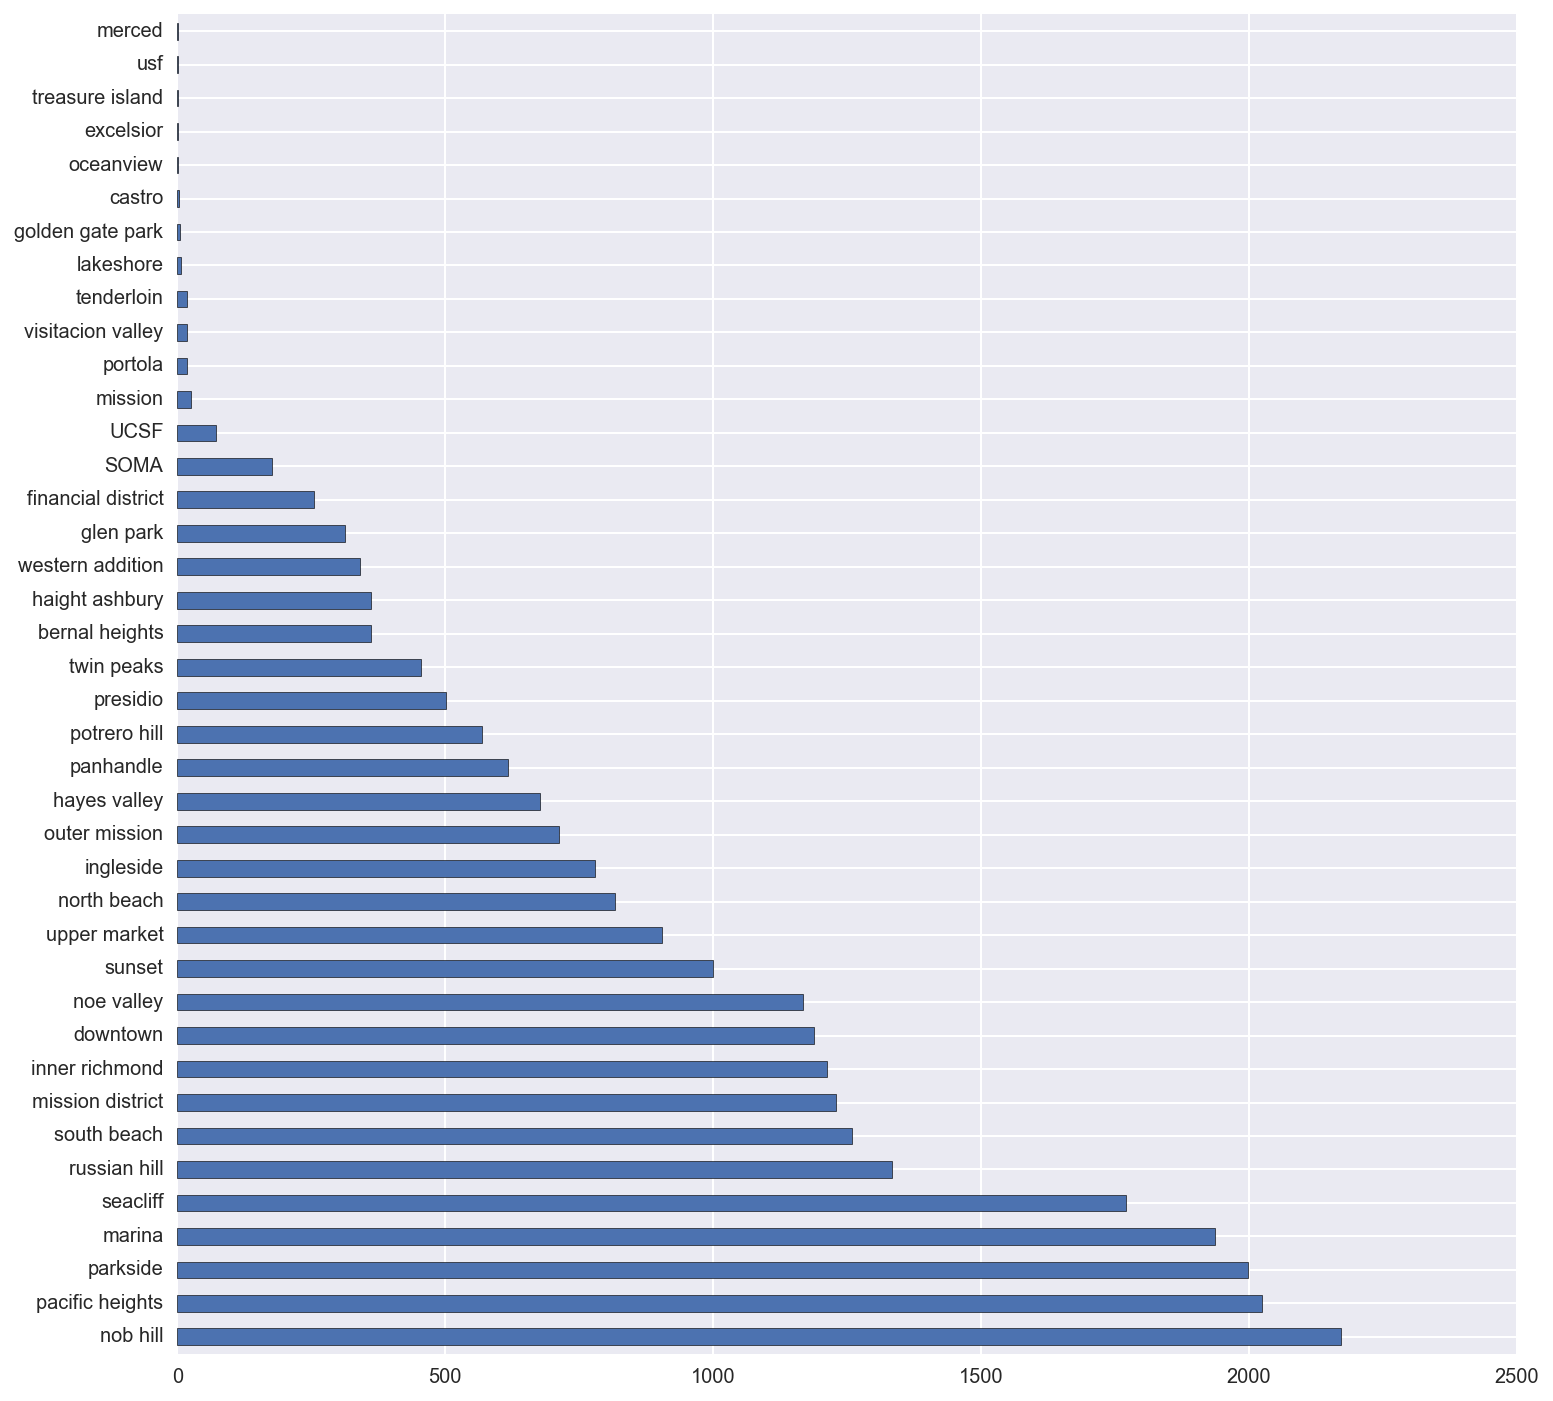

In [75]:
sns.set(rc={"figure.figsize": (12, 12)})

my_df.district1.value_counts().plot(kind='barh')

In [30]:
my_df = pd.DataFrame({'year':yr,'pr':pr,'beds':beds, 'district1':dr1,'district2':dr2,'descrip':post_descrip})
my_df.year.value_counts()

2005    13412
2004     5661
2006     3987
2011     1328
2007      775
2003      442
2008      435
2009      176
2010       85
Name: year, dtype: int64

In [ ]:
my_df.districts.value_counts()


In [ ]:
import Levenshtein
Levenshtein.ratio('hello world', 'hello')

# Result: 0.625

# description[2006]

In [ ]:
rentals_pre2012[2006][1:4]

In [ ]:
evictions = pd.read_csv('../Capstone/Eviction_Notices.csv')

In [ ]:
len(evictions['Neighborhoods - Analysis Boundaries'].unique())

In [ ]:
districts_set = set(evictions[evictions['Neighborhoods - Analysis Boundaries'].isnull() == False]['Neighborhoods - Analysis Boundaries'])
len(districts_set)
districts_set = str(list(districts_set)).lower()

In [ ]:
districts_set = districts_set.replace('/','\', \'')
districts_set

In [ ]:
districts_set = ['inner richmond','upper','lower','inner' 'japantown', 'glen park', 'western addition', 'outer richmond', 'inner sunset', 'financial district', 
 'south beach', 'oceanview', 'merced', 'ingleside', 'presidio heights', 'bernal heights', 'golden gate park', 'south of market',
 'portola', 'potrero hill', 'treasure island', 'pacific heights', 'hayes valley', 'excelsior', 'visitacion valley', 'mission bay', 
 'castro', 'upper market', 'sunset', 'parkside', 'mclaren park', 'nob hill', 'lakeshore', 'west of twin peaks', 'chinatown', 'noe valley', 
 'north beach', 'marina', 'haight ashbury', 'lincoln park', 'bayview hunters point', 'seacliff', 'lone mountain', 'usf', 'presidio', 'mission', 
 'tenderloin', 'russian hill', 'outer mission', 'twin peaks','mission district']

In [ ]:
districts_zip = zip(districts_set, districts_set[1:], districts_set[2:])

In [ ]:
# compare my districts to districts_set

In [77]:
my_df.beds.value_counts()

1br                                                                  12805
2br                                                                   8078
3br                                                                   2963
4br                                                                    606
5br                                                                    152
large                                                                   60
1                                                                       50
2                                                                       38
open                                                                    36
one                                                                     32
great                                                                   32
beautiful                                                               30
spacious                                                                26
sunny                    